# Evaluate Exercises
Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

1. Load the tips dataset from either pydataset or seaborn.

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

``` python
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined
model = LinearRegression().fit(X, y)
predictions = model.predict(X)
``` 
Modify and add to the code above as necessary for it to work with the tips dataset.

3. Plot the residuals for the linear regression model that you made.

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7. What is the amount of variance explained in your model?

8. Is your model better than the baseline model?

9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false
10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

<hr style="border-top: 10px groove darkmagenta; margin-top: 1px; margin-bottom: 1px"></hr>

In [61]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# set seaborn defaults
sns.set_palette('plasma')

In [118]:
sns.color_palette()

[(0.32515, 0.006915, 0.639512),
 (0.546157, 0.038954, 0.64701),
 (0.723444, 0.196158, 0.538981),
 (0.85975, 0.360588, 0.406917),
 (0.95547, 0.533093, 0.28549),
 (0.994495, 0.74088, 0.166335)]

In [7]:
# show documentation about tips dataset
data('tips', show_doc = True)

tips

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Tipping data

### Description

One waiter recorded information about each tip he received over a period of a
few months working in one restaurant. He collected several variables:

### Usage

    data(tips)

### Format

A data frame with 244 rows and 7 variables

### Details

  * tip in dollars, 

  * bill in dollars, 

  * sex of the bill payer, 

  * whether there were smokers in the party, 

  * day of the week, 

  * time of day, 

  * size of the party. 

In all he recorded 244 tips. The data was reported in a collection of case
studies for business statistics (Bryant & Smith 1995).

### References

Bryant, P. G. and Smith, M (1995) _Practical Data Analysis: Case Studies in
Business Statistics_. Homewood, IL: Richard D. Irwin Publishing:




In [244]:
df = data('tips')

In [10]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


In [13]:
df.shape

(244, 7)

In [245]:
# set up target, continuous vars, and catigorical variables
target = 'tip'
cont_vars = ['total_bill']
cat_vars = list(df.drop(columns = cont_vars).drop(columns=target).columns)

### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.


In [246]:
# define X and y
X = df[cont_vars]
y = df[target]

# make model and predctions
model = LinearRegression().fit(X, y)
predictions = model.predict(X)


In [247]:
# add predictions to dataframe
df['yhat'] = predictions
df.head(2)

,total_bill,tip,sex,smoker,day,time,size,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223


### 3. Plot the residuals for the linear regression model that you made.


In [255]:
# find risiduals (actuals minus predictions)
df['residuals'] = df.tip - df.yhat

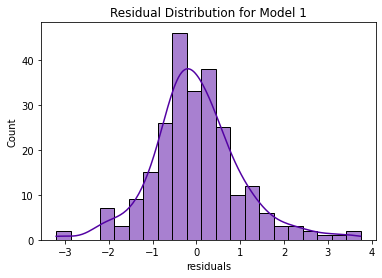

In [40]:
# plot distribution of residuals
sns.histplot(x = 'residuals', data = df, kde=True)
plt.title('Residual Distribution for Model 1')
plt.show()

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

Has to do with the model
- Sum of SE
- Mean SE
- Root Mean SE

Has to do with the Average (or baseline)
- Explained SS
- Total SS

R2


In [58]:
# Sum of SE is actuals - predictions, ^2 and added together
sse = ((df.tip - df.yhat) ** 2).sum()
print(f'SSE is {sse:.5}')

SSE is 252.79


In [60]:
# Mean SE is actuals - predictions, ^2 added together (same as SSE) BUT over the number of things
mse = sse / df.shape[0]
print(f'MSE is {mse:.3}')

MSE is 1.04


In [74]:
# root mean SE is actuals - predictions, ^2 added together, over the number of things (same as MSE), BUT square root of all that
rmse = math.sqrt(mse)
print(f'RMSE is {rmse:.4}')

RMSE is 1.018


In [71]:
# Explained SS is predictions - baseline (or average) ^ 2, added together
ess = ((df.yhat - df.tip.mean()) ** 2).sum()
print(f'ESS is {ess:.5}')

ESS is 212.42


In [70]:
# Total SS is actuals - baseline (or average) ^ 2, added together
tss = ((df.tip - df.tip.mean()) ** 2).sum()
print(f'TSS is {tss:.5}')

TSS is 465.21


In [259]:
def sse(actuals, predictions):
    sse = ((df[actuals] - df[predictions]) ** 2).sum()
    return sse

In [261]:
def mse(actuals, predictions):
    
    mse = sse(actuals,predictions) / df.shape[0]
    
    return mse

In [262]:
def rmse(actuals, predictions):
    
    rmse = mse(actuals, predictions) ** .5
    
    return rmse

In [263]:
def ess(actuals, predictions):
    
    ess = ((df[predictions] - df[actuals].mean()) ** 2).sum()

In [264]:
def tss(actuals, predictions):
    
    tss = ((df[actuals] - df[actuals].mean()) ** 2).sum()
    
    return tss

In [271]:
# doesn't work
def r_sq(actuals, predictions):
    
    ess = ess(actuals, predictions)
    tss = tss(actuals, predictions)
    
    r_sq = ess/tss
    
    return r_sq

In [80]:
# create function to do this in one shot 

def hip_to_be_square(df, actuals, predictions, print_out = False):
    '''
    This function takes in a dataframe, the name of the actuals columns, the name of the predictions column.
    It prints out the Sum of SE, Mean SE, Root Mean SE, Explained SS, and Total SS. 
    Returns them in 5 variables. In order listed above
    ex: sse, mse, rmse, ess, tss = hip_to_be_square(df, 'actuals', 'yhat', print_out = True)
    '''
    # calculate Sum of Squared Error
    sse = ((df[actuals] - df[predictions]) ** 2).sum()
    
    # calculate Mean of Squared Error
    mse = sse / df.shape[0]
    
    # calculate Root Mean of Squared Error
    rmse = mse ** .5
    
    # calculate Explained Sum of Squares 
    ess = ((df[predictions] - df[actuals].mean()) ** 2).sum()
    
    # calculate Total Sum of Squares
    tss = ((df[actuals] - df[actuals].mean()) ** 2).sum()
    
    if print_out == True:
        
        print(f'''
            The Sum of Squared Error: {sse:.2f}
            The Mean Squared Error: {mse:.2f}
            The Root Mean Squared error: {rmse:.2f}
            -----------------------------------
            The Mean Explained Sum of Squares: {ess:.2f}
            The Total Sum of Squares: {tss:.2f}
            ''')
    return sse, mse, rmse, ess, tss

In [83]:
sse_m, mse, rmse, ess, tss = hip_to_be_square(df, 'tip', 'yhat', print_out = True)


            The Sum of Squared Error: 252.79
            The Mean Squared Error: 1.04
            The Root Mean Squared error: 1.02
            -----------------------------------
            The Mean Explained Sum of Squares: 212.42
            The Total Sum of Squares: 465.21
            


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [41]:
#create baseline using average tip 
# hmm that's pretty low I'm going to take a look at min and maxes
df.tip.mean() 

2.9982786885245902

In [43]:
# ah ok min bill is $3 and the max is about $50
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,1.978594e+01,8.902412,3.070000,13.347500,17.795000,24.127500,50.810000
tip,244.0,2.998279e+00,1.383638,1.000000,2.000000,2.900000,3.562500,10.000000
size,244.0,2.569672e+00,0.951100,1.000000,2.000000,2.000000,3.000000,6.000000
yhat,244.0,2.998279e+00,0.934972,1.242695,2.322084,2.789181,3.454249,6.256565
residuals,244.0,3.330669e-16,1.019943,-3.198225,-0.565162,-0.097445,0.486311,3.743435


In [251]:
#onward with creating the baseline
df['baseline'] = df.tip.mean() 

In [84]:
sse_b, mse, rmse, ess, tss = hip_to_be_square(df, 'tip', 'baseline', print_out = True)


            The Sum of Squared Error: 465.21
            The Mean Squared Error: 1.91
            The Root Mean Squared error: 1.38
            -----------------------------------
            The Mean Explained Sum of Squares: 0.00
            The Total Sum of Squares: 465.21
            


In [252]:
df['baseline_residuals'] = df.tip - df.baseline

### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [91]:
def sse_compare(sse1, sse2, model1, model2 = 'baseline'):
    '''
    sse1 must be for model 1
    sse2, must be for model 2 (which is by default the baseline)
    model1 = string name of the model you're comparing
    This function compares two SSEs. and outputs which one performed better
    '''
    
    if sse1 > sse2:
        print(f'{model1} is not better than {model2}.')
    elif sse1 < sse2:
        print(f'{model1} is better than {model2}. Difference: {sse2 - sse1:.2f}')
    else:
        print(f'{model1} performs the same as {model2}')

In [92]:
sse_compare(sse_m, sse_b, 'model1')

model1 is better than baseline. Difference: 212.42


### 7. What is the amount of variance explained in your model?
- SSE is the amount of Dollars we predict that we're off by
- with our model, we reduced the amount we were wrong, by $212 in comparison to the Baseline 
- Baseline SSE was ~465 and our model's SSE was ~252

In [87]:
sse_b - sse_m

212.4237331984044

### 8. Is your model better than the baseline model?

- yes! 

### 9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [235]:
# plot residuals

def plot_residuals(df, x_list, palette = "tab10"):
    '''
    This function takes in a dataframe and a list of all the risiduals you would like to plot (that means the names of the columns)
    '''
    color_list= list(sns.color_palette(palette))
    fig, ax = plt.subplots(figsize=(10, 5))
    for x, c in zip(x_list, color_list):
        sns.histplot(x = x, data = df, kde=True, ax = ax, alpha = 0.5, color = c, legend=True, lw = .1)
    
    plt.legend(x_list)  
    plt.show()

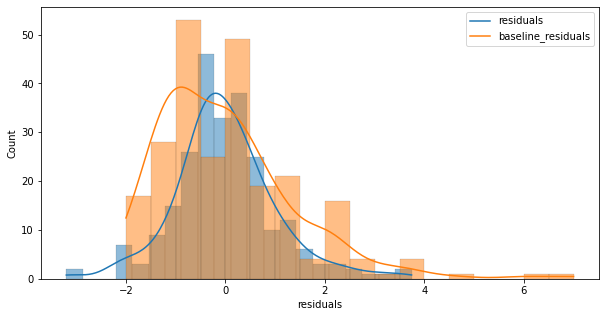

In [237]:
plot_residuals(df, ['residuals', 'baseline_residuals'])

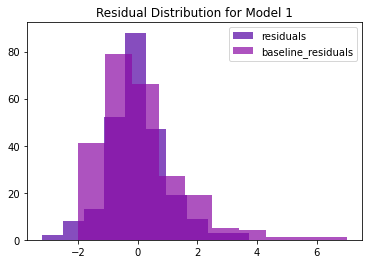

In [147]:
# how to plot with matplotlib instead of seaborn
plt.hist(df['residuals'], label='residuals', alpha=.7)
plt.hist(df['baseline_residuals'], label = 'baseline_residuals',alpha=.7)
plt.title('Residual Distribution for Model 1')
plt.legend()
plt.show()

In [249]:
df[['tip', 'yhat']]

,tip,yhat
1,1.01,2.704636
2,1.66,2.006223
3,3.50,3.126835
4,3.31,3.407250
5,3.61,3.502822
...,...,...
240,5.92,3.969131
241,2.00,3.774836
242,2.00,3.301175
243,1.75,2.791807


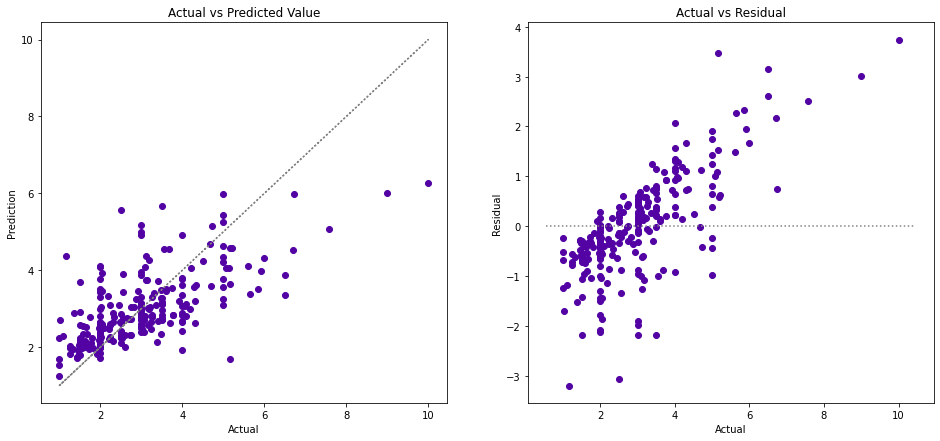

In [258]:
# function for plotting dot residuals
plt.figure(figsize=(16, 7))
ax = plt.subplot(1, 2, 1)
ax.scatter(df.tip, df.yhat, label='predicted')
ax.set(title='Actual vs Predicted Value', ylabel='Prediction', xlabel='Actual')
ax.plot(df.tip, df.tip, ls=':', c='gray')
#put r^2 value on graph
# and rmse and rmse of baseline

ax = plt.subplot(1, 2, 2)
ax.scatter(df.tip, df.residuals)
ax.set(title = 'Actual vs Residual',ylabel='Residual', xlabel='Actual')
ax.hlines(0, *ax.get_xlim(), ls=':', color='gray')

In [287]:
df.tip.max()

10.0

In [295]:
# maybe in the future add creating the preditions and the residuals if none were entered 
# have to import sklearn stuff

def plot_the_dots(actuals, predictions, residuals):
    '''
    This function takes in the actuals (i.e. df.actuals), predictions, and residuals and outputs two graphs.
    One to see the regression line and the actuals/predictions
    One to see the actuals vs the residuals.
    '''
    
    r_sq = r2_score(actuals, predictions)
    rmse = mean_squared_error(actuals, predictions, squared = False)
    
    text_loc = actuals.max() - 2
    
    # plots actual vs predicted
    plt.figure(figsize=(16, 7))
    ax = plt.subplot(1, 2, 1)
    ax.scatter(actuals, predictions, label='predicted')
    ax.set(title='Actual vs Predicted Value', ylabel='Prediction', xlabel='Actual')
    ax.plot(actuals, actuals, ls=':', c='gray')
    ax.text(text_loc, 1, f'R^2: {r_sq:.2f}', fontsize='large')
    
    #put r^2 value on graph
    # and rmse and rmse of baseline
    
    ax = plt.subplot(1, 2, 2)
    ax.scatter(actuals, residuals)
    ax.set(title = 'Actual vs Residual',ylabel='Residual', xlabel='Actual')
    ax.hlines(0, *ax.get_xlim(), ls=':', color='gray')
    ax.text(text_loc, -3, f'RMSE: {rmse:.2f}')

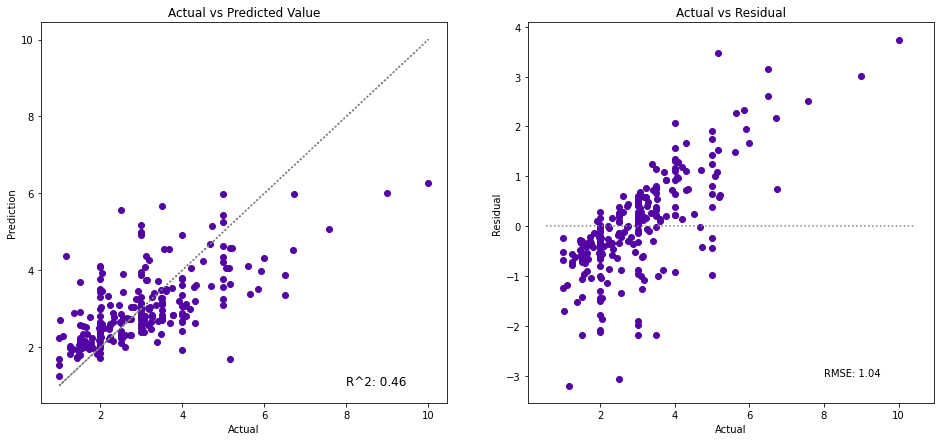

In [294]:
plot_the_dots(df.tip, df.yhat, df.residuals)

In [167]:
# - regression_errors(y, yhat): returns the following values:
#     - sum of squared errors (SSE)
#     - explained sum of squares (ESS)
#     - total sum of squares (TSS)
#     - mean squared error (MSE)
#     - root mean squared error (RMSE)
# create function to do this in one shot 

# this version is slightly different than the one above

def hip_to_be_square(y, yhat, print_out = False):
    '''
    This function takes the actuals (y), 
    and the predictions (yhat).
    optional arguement print_out. bool. when set to True will print out summary
    It prints out the Sum of SE, Mean SE, Root Mean SE, Explained SS, and Total SS. 
    Returns them in 5 variables. In order listed above
    ex: sse, mse, rmse, ess, tss = hip_to_be_square(df, 'actuals', 'yhat', print_out = True)
    '''
    # calculate Sum of Squared Error
    sse = ((y - yhat) ** 2).sum()
    
    # calculate Mean of Squared Error
    mse = sse / y.shape[0]
    
    # calculate Root Mean of Squared Error
    rmse = mse ** .5
    
    # calculate Explained Sum of Squares 
    ess = ((yhat - y.mean()) ** 2).sum()
    
    # calculate Total Sum of Squares
    tss = ((y - y.mean()) ** 2).sum()
    
    if print_out == True:
        
        print(f'''
            The Sum of Squared Error: {sse:.2f}
            The Mean Squared Error: {mse:.2f}
            The Root Mean Squared error: {rmse:.2f}
            -----------------------------------
            The Mean Explained Sum of Squares: {ess:.2f}
            The Total Sum of Squares: {tss:.2f}
            ''')
    return sse, mse, rmse, ess, tss

In [163]:
# baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model

def baseline_mean_errors(y):
    '''
    This function takes in the actuals (y). Computes the baseline model. 
    Returns the SSE, MSE, and RMSE for the baseline
    '''
    baseline = y.mean()
    
    # calculate Sum of Squared Error
    sse = ((y - baseline) ** 2).sum()
    
    # calculate Mean of Squared Error
    mse = sse / y.shape[0]
    
    # calculate Root Mean of Squared Error
    rmse = mse ** .5
    
    return sse, mse, rmse

In [164]:
# perform a functio test using rando variables
# and it works! checked with numbers above
a, b, c = baseline_mean_errors(df.tip)
a, b, c

(465.2124770491804, 1.906608512496641, 1.3807999538298954)

In [169]:
# better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

def better_than_baseline(y, yhat):
    '''
    This function takes in actuals (y) and predictions (yhat) 
    and returns true if the model performs better than baseline. 
    '''
    # calculate values for baseline
    sse_b, mse_b, rmse_b = baseline_mean_errors(y)
    
    # calculate values for model
    sse, mse, rmse_model, ess, tss = hip_to_be_square(y, yhat, print_out=False)
    
    # compare rmse from baseline and model
    
    # If Root Mean Square Error is smaller for the model than for the baseline, model is better, return True
    if rmse_model < rmse_b:
        return True
    # if Root mean Square error for the model is larger or the same as the baseline, return False 
    else:
        return False
    

In [171]:
better_than_baseline(df.tip, df.yhat)


True

<hr style="border-top: 10px groove darkmagenta; margin-top: 1px; margin-bottom: 1px"></hr>

### 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [185]:
import evaluate as ev
import wrangle as w
from sklearn.preprocessing import MinMaxScaler

In [173]:
mpg = data('mpg')

In [175]:
mpg.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact


In [182]:
# may need to scale these
mpg[['displ', 'hwy']].describe().T

,count,mean,std,min,25%,50%,75%,max
displ,234.0,3.471795,1.291959,1.6,2.4,3.3,4.6,7.0
hwy,234.0,23.440171,5.954643,12.0,18.0,24.0,27.0,44.0


In [206]:
mm_scaler = MinMaxScaler()
scaler_name = 'MnMx'
    
# make empty list for return
col_names = ['displ', 'hwy']
    
# loop through columns in col names
for col in col_names:
        
    #fit and transform to train, add to new column on train df
    mpg[f'{col}_{scaler_name}'] = mm_scaler.fit_transform(mpg[[col]]) 
    
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,hwy_MnMx,displ_MnMx,yhat,residuals,baseline,baseline_residuals
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,0.53125,0.037037,0.541956,-0.010706,0.357505,0.173745
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0.53125,0.037037,0.541956,-0.010706,0.357505,0.173745
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0.59375,0.074074,0.519890,0.073860,0.357505,0.236245
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,0.56250,0.074074,0.519890,0.042610,0.357505,0.204995
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,0.43750,0.222222,0.431625,0.005875,0.357505,0.079995


In [207]:
# define X and y
X = mpg[['displ_MnMx']]
y = mpg['hwy_MnMx']

# make model and predctions
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

In [208]:
# add predictions to column on dataframe
mpg['yhat'] = predictions

In [209]:
# use better than baseline function to see if it's better
ev.better_than_baseline(mpg.hwy_MnMx, mpg.yhat)

True

In [192]:
# maybe make this more customizable for having more than one model

def get_residuals(df, y, yhat, get_baseline = False):
    '''
    this function creates columns that have the residuals in them
    optional arguement get_baseline. When True will add a baseline column to dataframe as well
    '''
    
    df['residuals'] = df[y] - df[yhat]
    
    if get_baseline == True:
        df['baseline'] = df[y].mean()
        df['baseline_residuals'] = df[y] - df['baseline']
    
    return df

In [210]:
mpg_df = get_residuals(mpg, 'hwy_MnMx', 'yhat', get_baseline=True)
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,hwy_MnMx,displ_MnMx,yhat,residuals,baseline,baseline_residuals
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,0.53125,0.037037,0.541956,-0.010706,0.357505,0.173745
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0.53125,0.037037,0.541956,-0.010706,0.357505,0.173745
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0.59375,0.074074,0.519890,0.073860,0.357505,0.236245
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,0.56250,0.074074,0.519890,0.042610,0.357505,0.204995
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,0.43750,0.222222,0.431625,0.005875,0.357505,0.079995


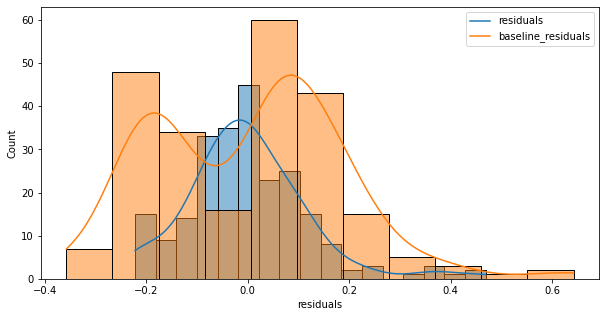

In [211]:
ev.plot_residuals(mpg_df, ['residuals', 'baseline_residuals'])

In [212]:
ev.hip_to_be_square(mpg.hwy_MnMx, mpg.yhat, print_out = True)


            The Sum of Squared Error: 3.33
            The Mean Squared Error: 0.01
            The Root Mean Squared error: 0.12
            -----------------------------------
            The Mean Explained Sum of Squares: 4.73
            The Total Sum of Squares: 8.07
            


(3.333817391597136,
 0.01424708287007323,
 0.11936114472504539,
 4.7342122892255105,
 8.068029680822647)

In [213]:
ev.hip_to_be_square(mpg.hwy_MnMx, mpg.baseline, print_out=True)


            The Sum of Squared Error: 8.07
            The Mean Squared Error: 0.03
            The Root Mean Squared error: 0.19
            -----------------------------------
            The Mean Explained Sum of Squares: 0.00
            The Total Sum of Squares: 8.07
            


(8.068029680822647,
 0.0344787593197549,
 0.18568456941747988,
 0.0,
 8.068029680822647)

In [215]:
# inverse transform the predictions back using the scaler
# MAKE SURE your scaler goes with the right variable
mpg['hwy_predictions_mpg'] = mm_scaler.inverse_transform(mpg[['yhat']])

In [218]:
# see predictions with actuals
mpg[['hwy','hwy_predictions_mpg']]

,hwy,hwy_predictions_mpg
1,29,29.342591
2,29,29.342591
3,31,28.636473
4,30,28.636473
5,26,25.812002
...,...,...
230,28,28.636473
231,29,28.636473
232,26,25.812002
233,26,25.812002
